# STUDENT PERFORMANCE INDICATORS

## Life Cycle Of Machine Learning Project

* Understanding the problem statement
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre-processing
* Model Training
* Choose Besst Model

## 1) Problem Statement

* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection

* **Dataset Source** - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

## 2.1 Importing Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


## Importing CSV data as Pandas dataframe

In [3]:
students = pd.read_csv('data/stud.csv')

## Show Top 5 Records

In [4]:
students.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape Of the Dataset

In [5]:
students.shape

(1000, 8)

## 2.2 Dataset Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

## 3. Data Checks to Perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

## 3.1 Check Missing Values

In [6]:
students.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the dataset.**

## 3.2 Check Duplicates

In [7]:
students.duplicated().sum()

0

**There are no duplicate values in the dataset.**

## 3.3 Check Data type

In [8]:
# Check null & dtypes
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of unique values of each column

In [9]:
students.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check statistics of data set

In [10]:
students.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights

* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score of 0 for maths, for writing minimum score is higher, equal to 10 and for reading minimum score is much higher = 17.

# 3.7 Exploring Data

In [11]:
students.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable: ", end=" " )
print(students['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(students['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" " )
print(students['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(students['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(students['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [13]:
# Define numerical & categorical columns

numeric_features = [feature for feature in students.columns if students[feature].dtype == 'int64']
categorical_features = [feature for feature in students.columns if students[feature].dtype == 'object']

# Print columns

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical_features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical_features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
students.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## 3.8 Adding columns for "Total_Score" & "Average_Score"

In [15]:
students['total_score'] = students['math_score'] + students['reading_score'] + students['writing_score']
students['average_score'] = students['total_score']/3

students.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
## Students with full marks in each subject

reading_full = students[students['reading_score']==100]['average_score'].count()
writing_full = students[students['writing_score']==100]['average_score'].count()
maths_full = students[students['math_score']==100]['average_score'].count()

print(f'Number of students with full marks in Maths: {maths_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks ins reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks ins reading: 17


In [17]:
## Students having less than 20 marks in each subject

reading_less_20 = students[students['reading_score'] <= 20]['average_score'].count()
writing_less_20 = students[students['writing_score'] <= 20]['average_score'].count()
math_less_20 = students[students['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks ins reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks ins reading: 1


**Insights**

* From above values we get that students have performed poorly in maths.
* And the best performance is in reading section.

# 4. Exploring Data (Visualization)
## 4.1 Visualize Average Score distribution to make some conclusion

* Histogram
* Kernel Density Function (KDE)

4.1.1 Histogram & KDE

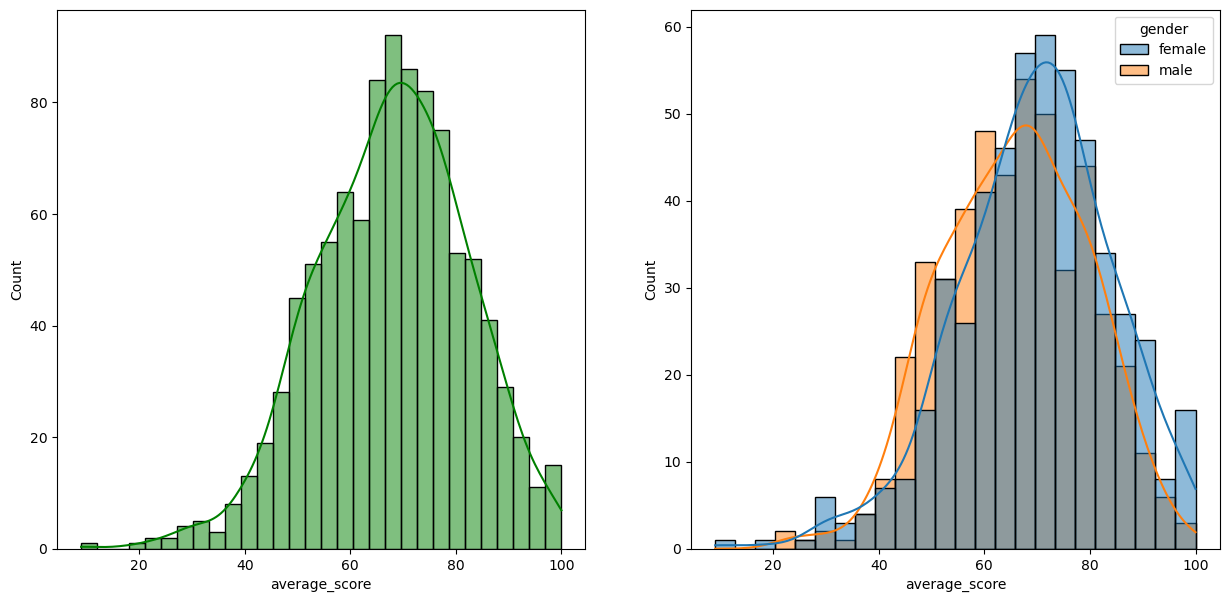

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)

sns.histplot(data=students, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)

sns.histplot(data=students, x='average_score', kde=True, hue='gender')
plt.show()



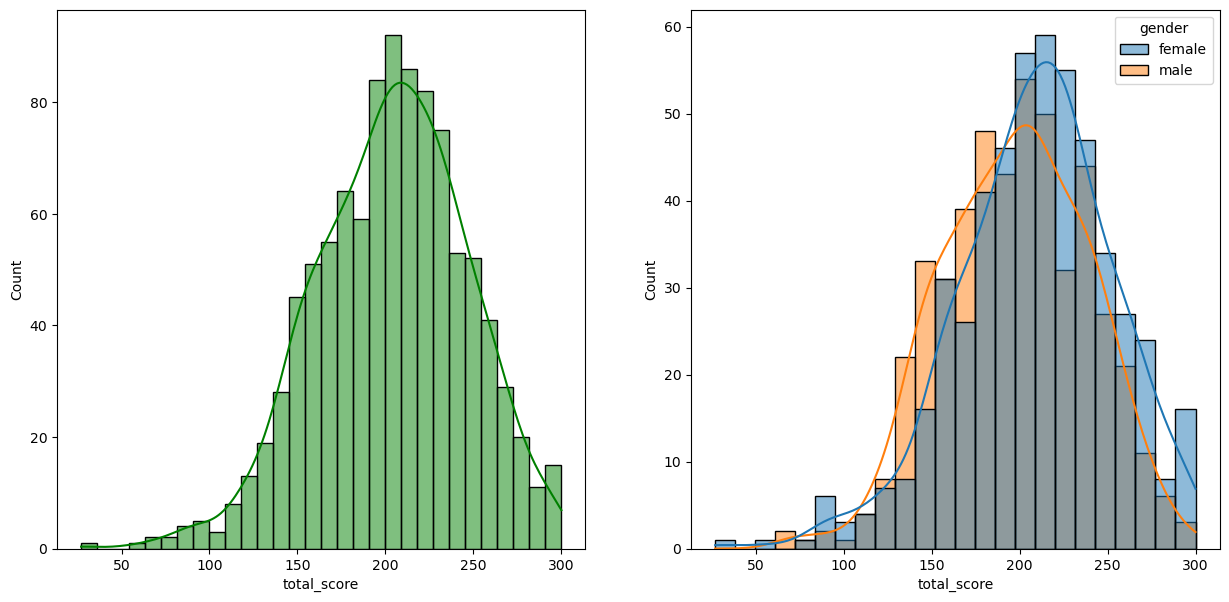

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)

sns.histplot(data=students, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)

sns.histplot(data=students, x='total_score', kde=True, hue='gender')
plt.show()



**Observation:**

* Female students perform well than male students.

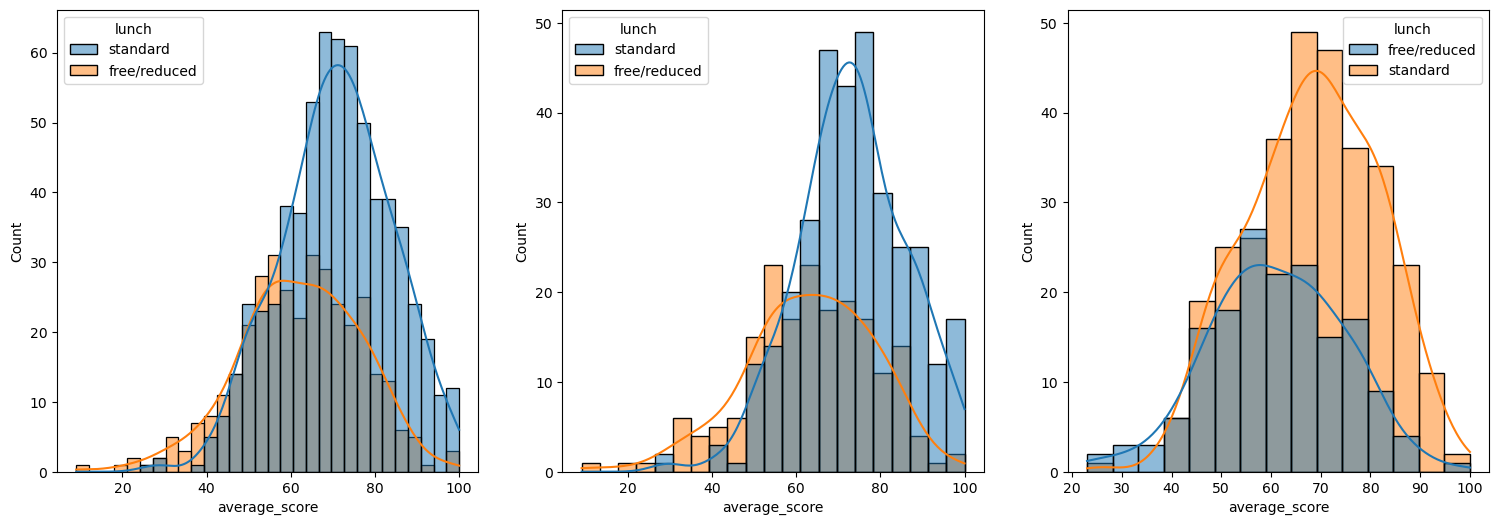

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)

sns.histplot(data=students, x='average_score', bins=30, kde=True, hue='lunch')
plt.subplot(142)

sns.histplot(data=students[students.gender == 'female'], x='average_score', kde=True, hue='lunch')
plt.subplot(143)

sns.histplot(data=students[students.gender == 'male'], x='average_score', kde=True, hue='lunch')
plt.show()



**Observation:**

* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams, be it male or female.

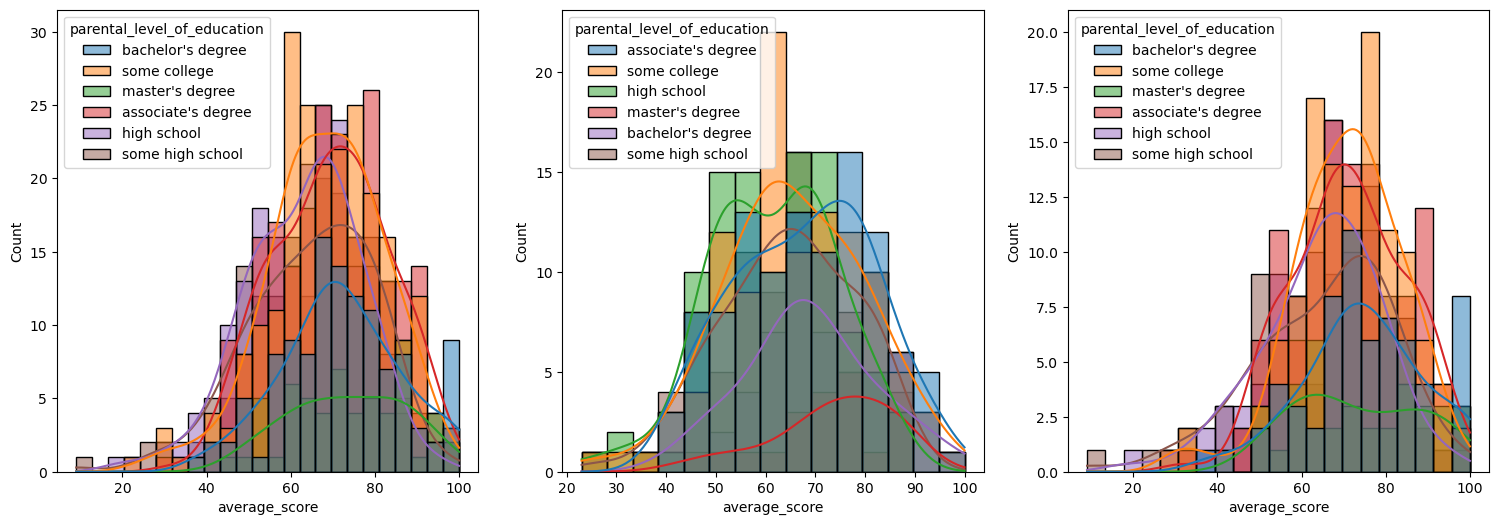

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=students,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=students[students.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=students[students.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

**Observation:**

* In general parent's education don't help students perform well in exams.
* In 2nd plot it shows that parent's with masters degree or associate degree, their male child tends to perform well in exams.
* In 3rd plot it shows that there is no effect of parent's education on female students.

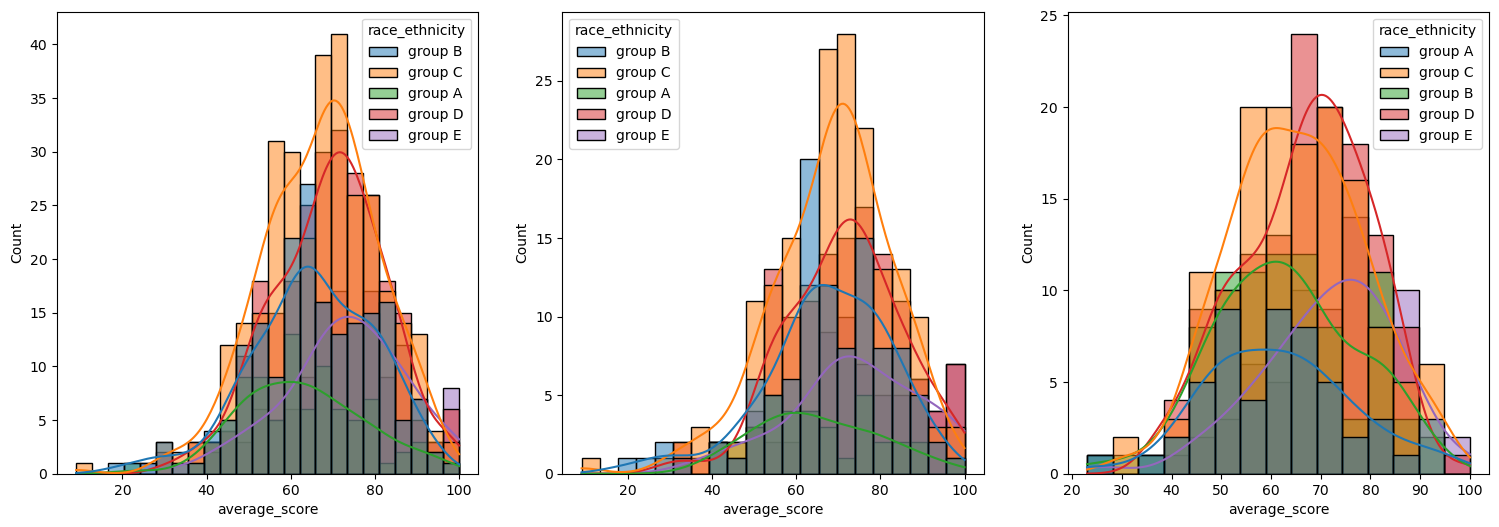

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=students,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=students[students.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=students[students.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

**Observation:**

* Students of group A and group B tends to perform poorly in exams.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

## 4.2 Maximum score of students in all three subjects

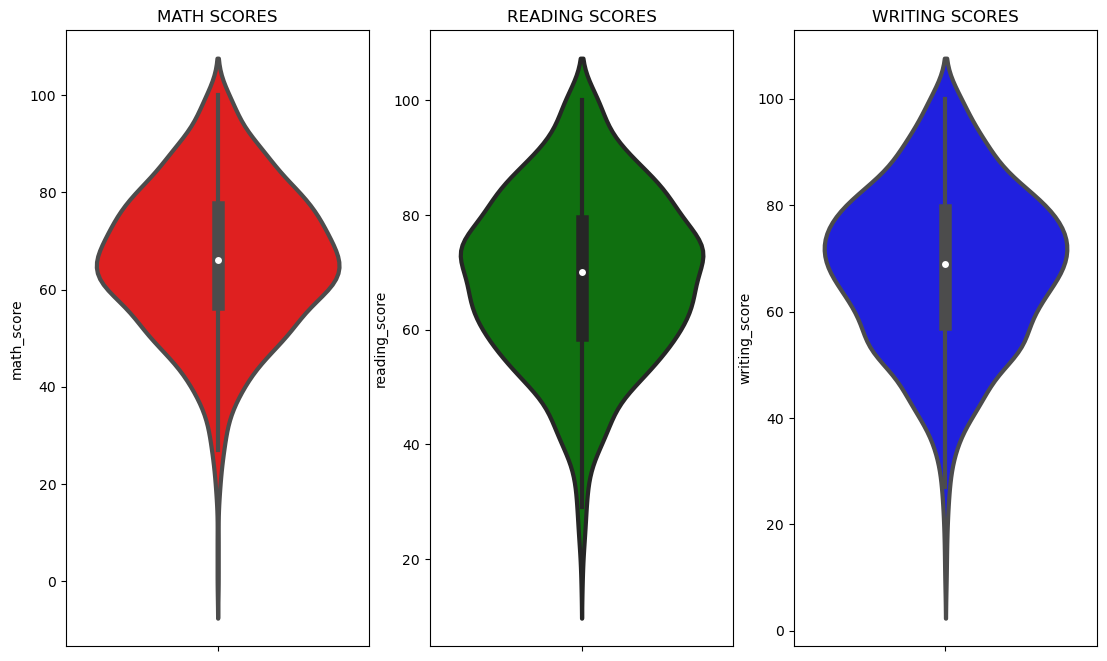

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=students,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=students,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=students,color='blue',linewidth=3)
plt.show()

**Observation:**
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

## 4.3 Multivariate analysis using pieplot

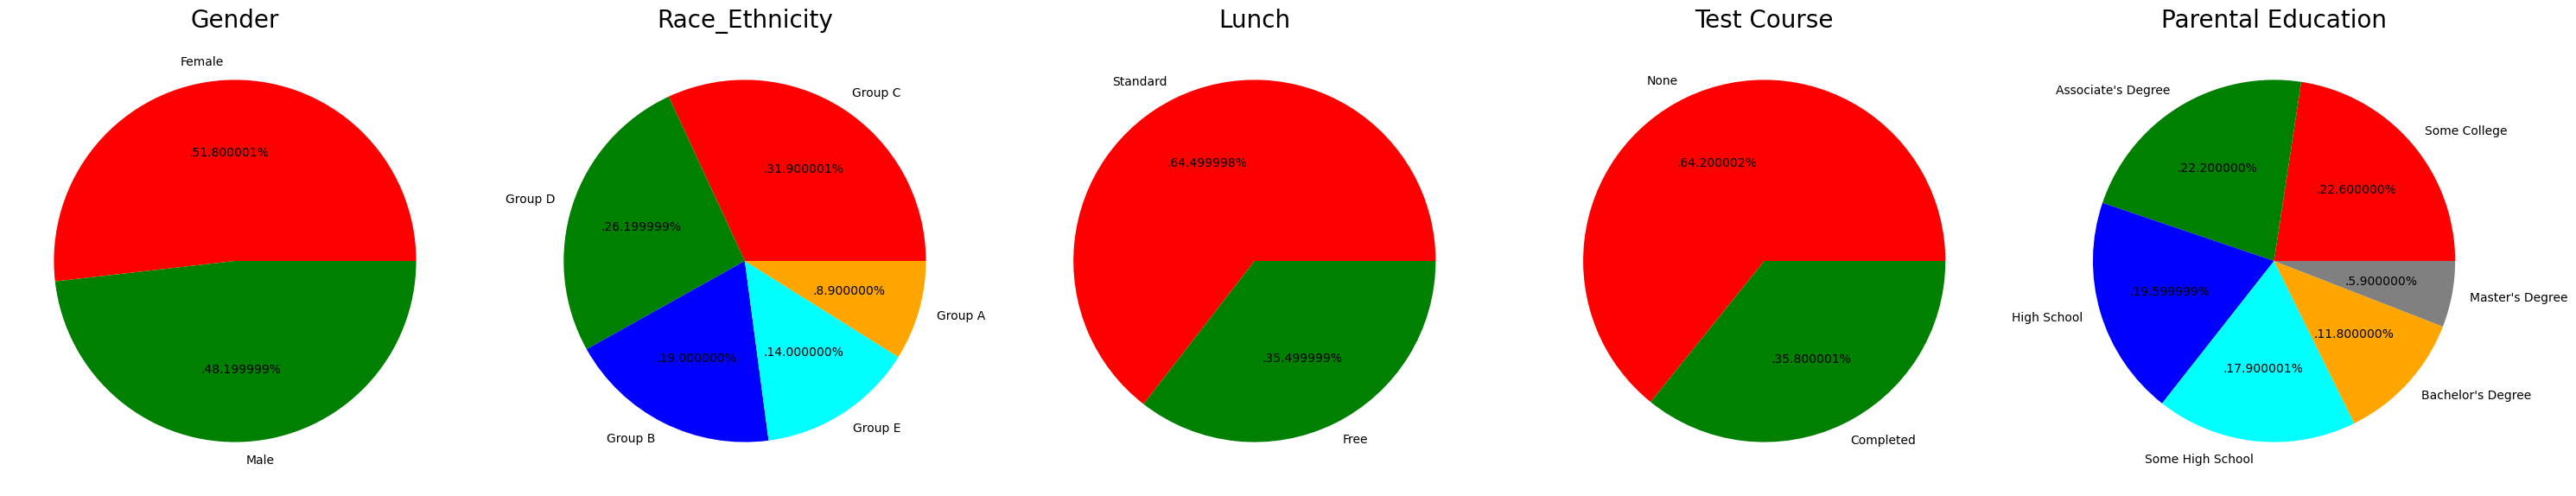

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = students['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = students['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = students['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = students['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = students['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

**Observation:**

* Plot1:- Number of Male and Female students is almost equal
* Plot2:- Number students are greatest in Group C
* Plot3:- Number of students who have standard lunch are greater
* Plot4:- Number of students who have not enrolled in any test preparation course is greater
* Plot5:- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN

* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

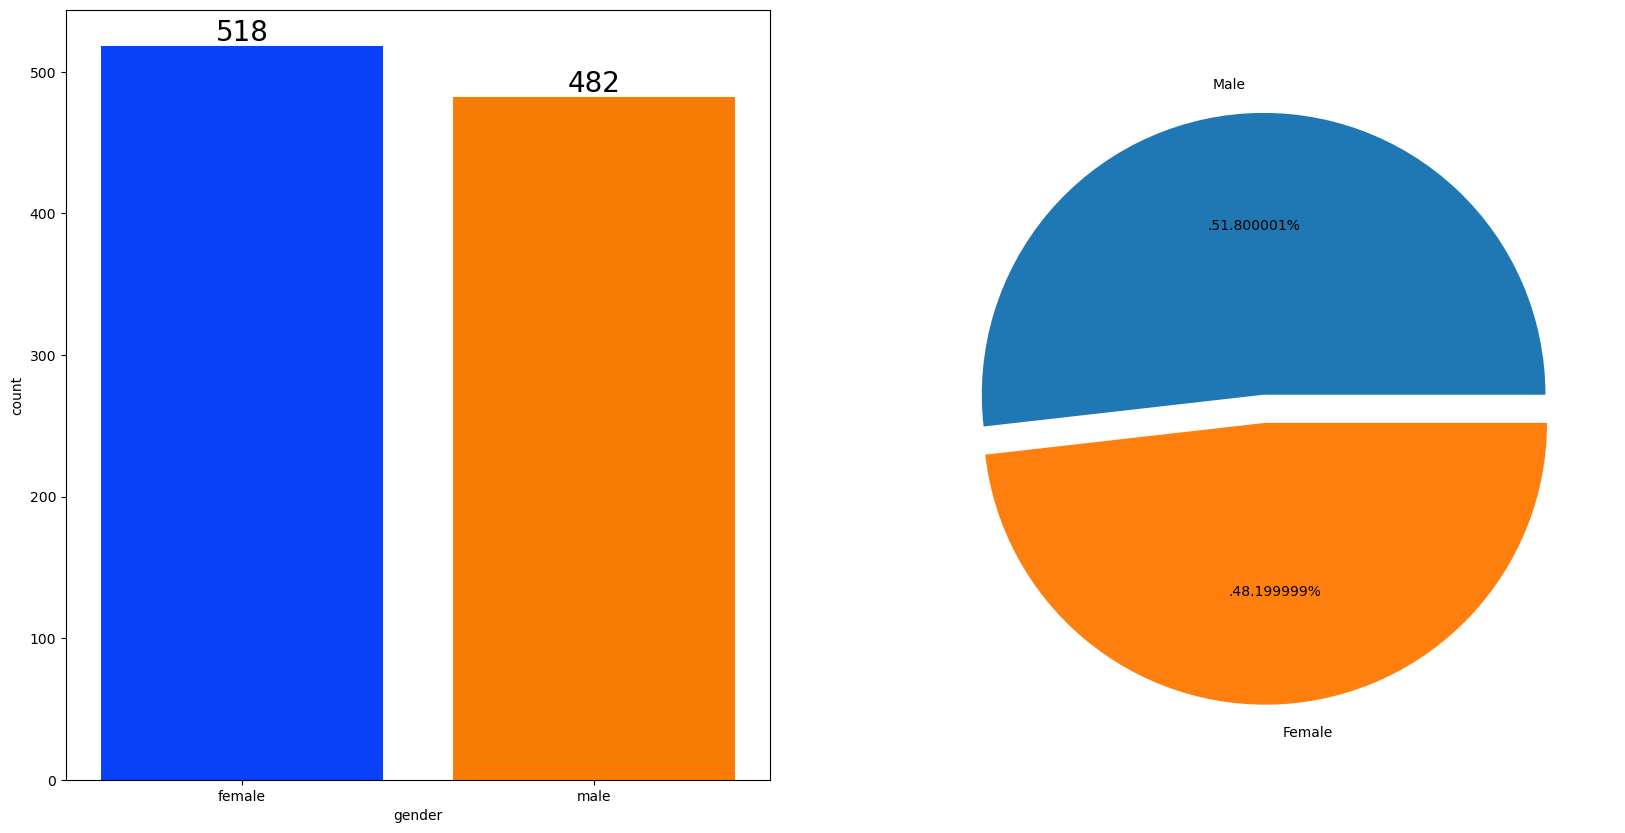

In [25]:
fig,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=students['gender'], data=students, palette= 'bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)

plt.pie(x=students['gender'].value_counts(), labels=['Male','Female'], explode=[0,0.1], autopct='.%2f%%')
plt.show()

**Observation:**

* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

## BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [26]:
gender_group = students.groupby('gender').mean
print(gender_group)

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002661EF80D00>>


In [27]:
gender_group = students.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


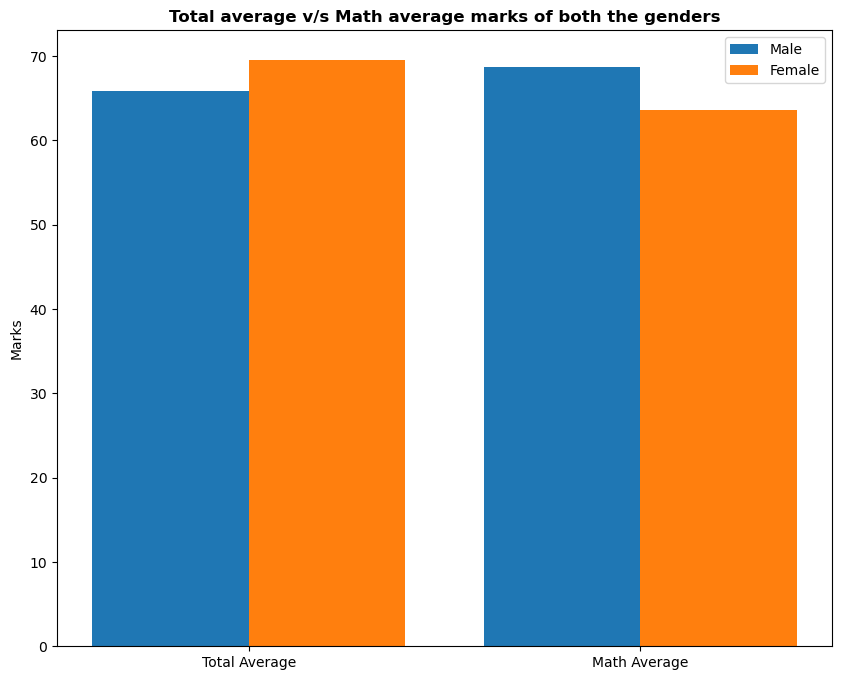

In [28]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label= 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight = 'bold')
plt.legend()
plt.show()

**Observation:**

* On an average female scores more than men.
* Whereas, males have scored higher in maths.

## 4.4.2 RACE_ETHNICITY COLUMN

* How is Group wise distribution ?
* Is Race_Ehnicity has any impact on student's performance ?

# UNIVARIATE ANALYSIS (How is group wise distribution?)

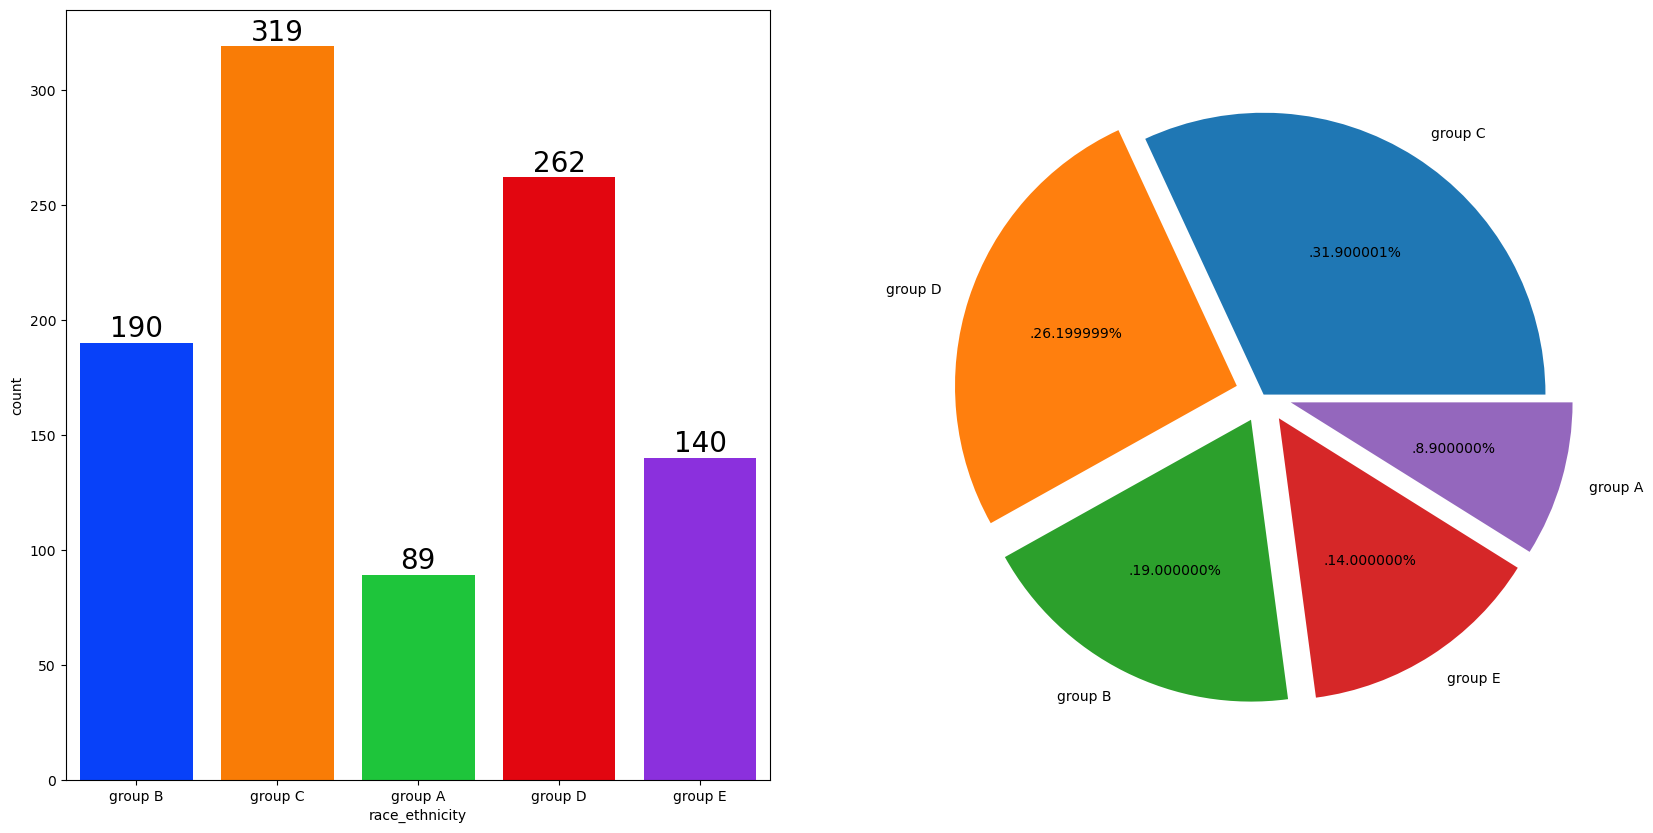

In [29]:
fig,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=students['race_ethnicity'], data=students, palette= 'bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)

plt.pie(x = students['race_ethnicity'].value_counts(),labels=students['race_ethnicity'].value_counts().index, explode=[0,0.1,0.1,0.1,0.1], autopct='.%2f%%')
plt.show()

**Observation:**

* Most of the students belong to the `Group C` and `Group D`.
* Lowest number of people are in `Group A`.

## BIVARIATE ANALYSIS ( Is Race_Ehnicity has any impact on student's performance?)

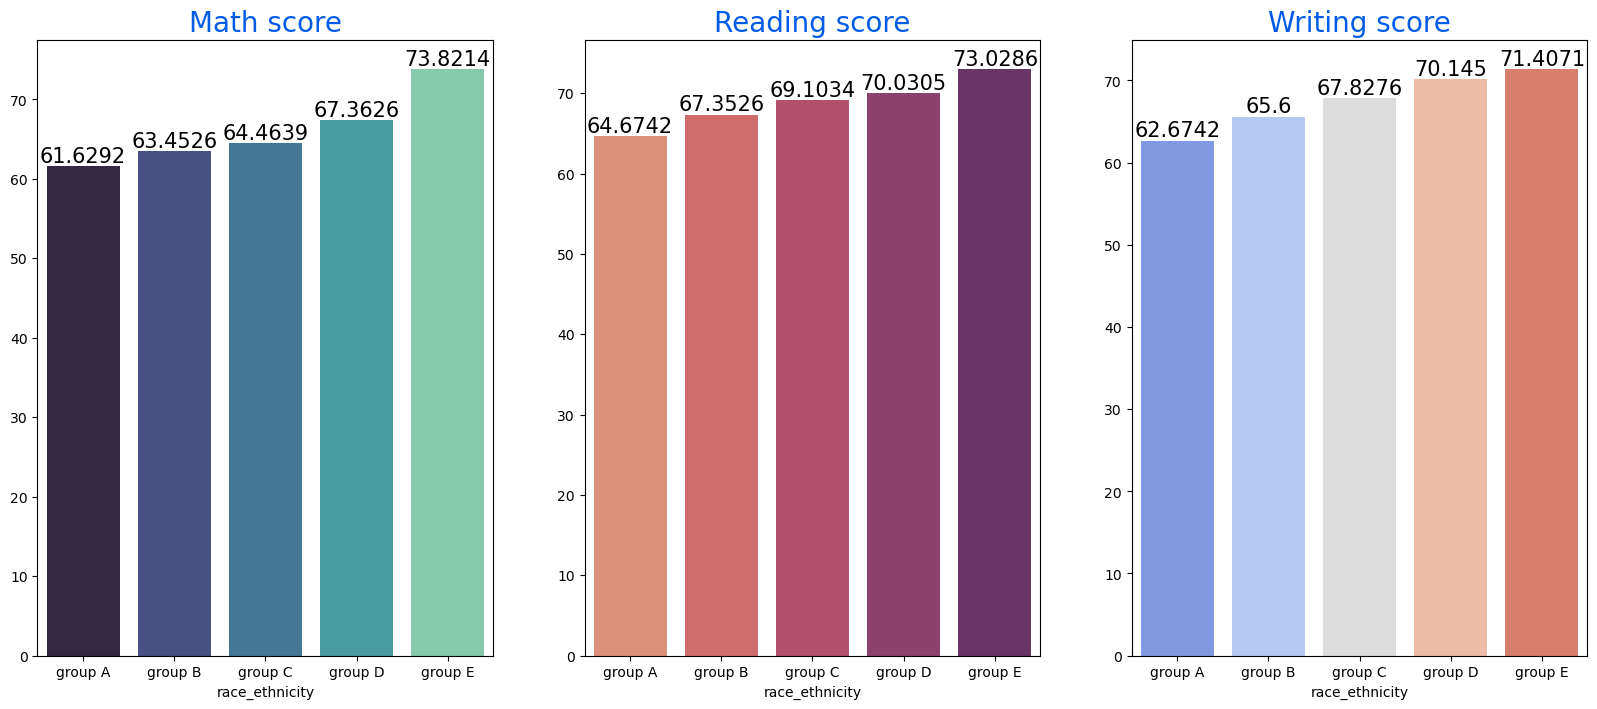

In [30]:
group_data2 = students.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index, y=group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Observations:**

* Group E students have scored highest marks.
* Group A students have scored lowest marks.

## 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

## UNIVARIATE ANALYSIS ( What is educational background of student's parent?)

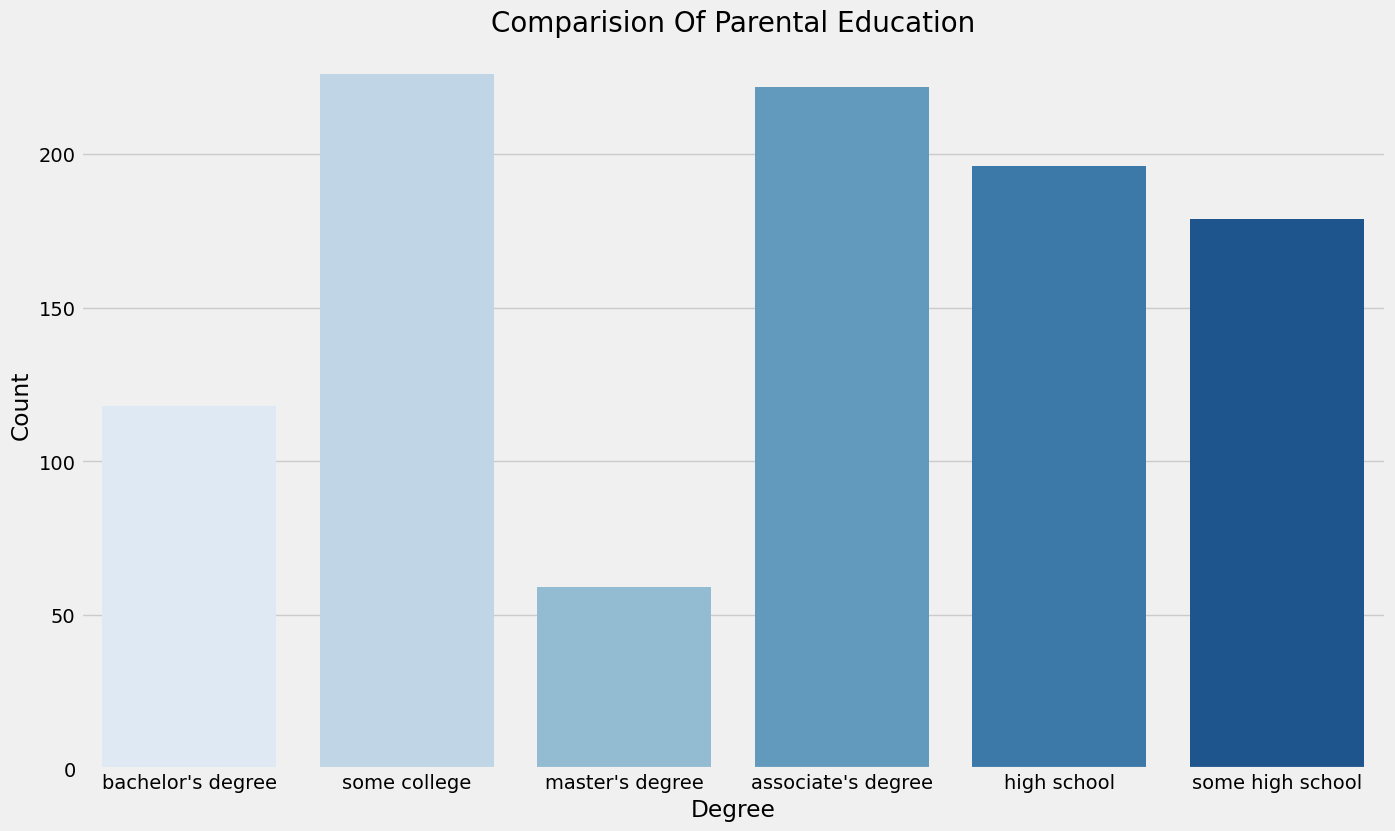

In [31]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')

sns.countplot(students['parental_level_of_education'], palette= 'Blues')
plt.title('Comparision Of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

**Observation:**

* Largest number of parents are from some college.

## BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

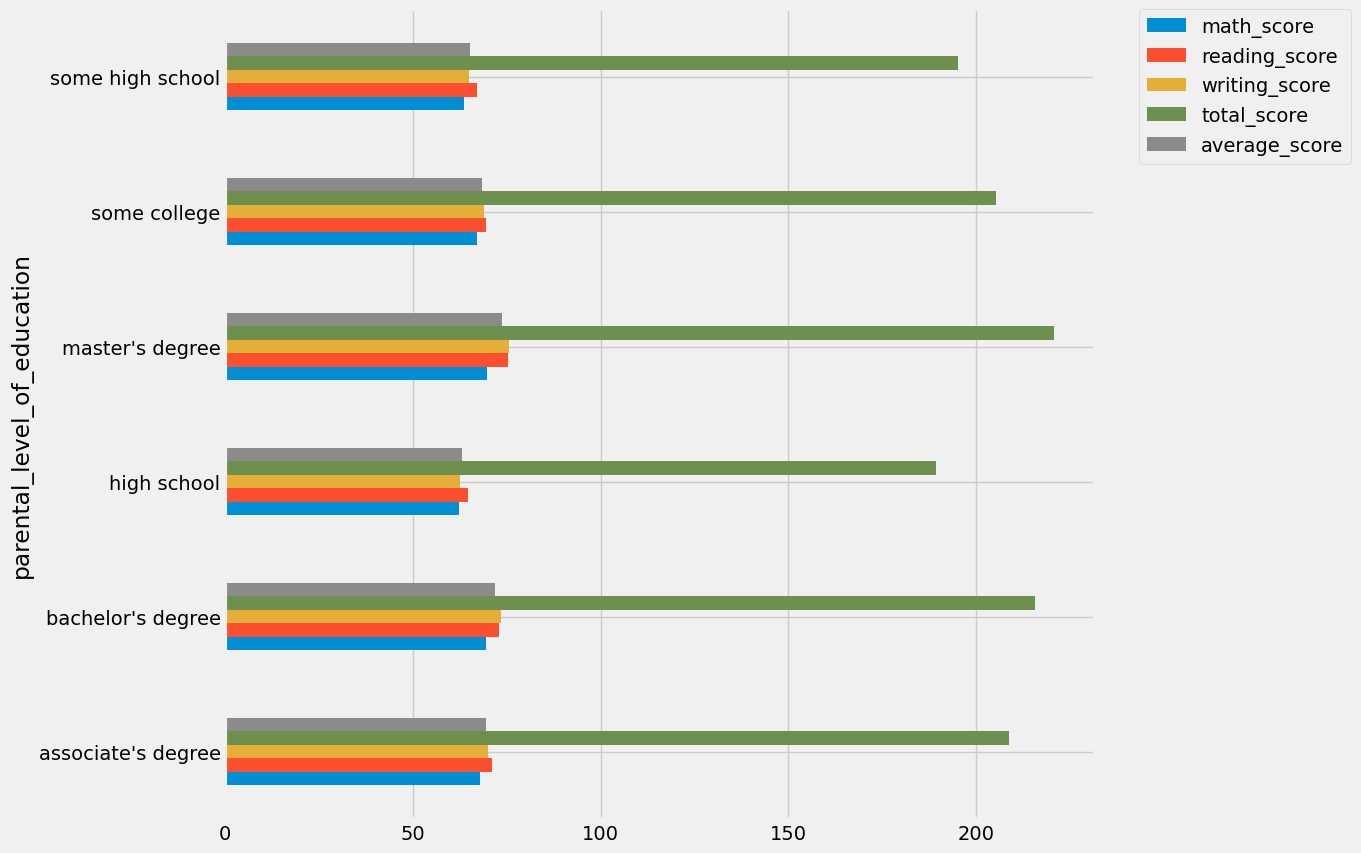

In [32]:
students.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
plt.show()

**Observation:**

* The scores of student whose parents possess masters and bachelor level of education are higher tthan others.

## 4.4.4 LUNCH COLUMN

* Which type of lunch is most common among students ?
* What is the effect of lunch type on test results?

## UNIVARIATE ANALYSIS ( Which type of lunch is most common among students ? )

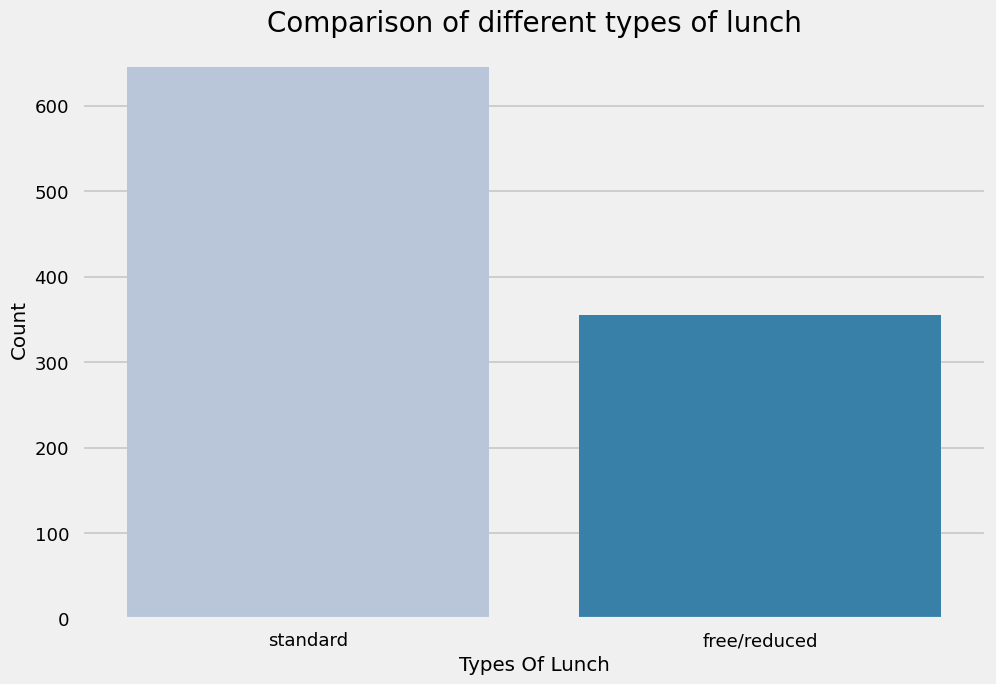

In [33]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(students['lunch'], palette= 'PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types Of Lunch')
plt.ylabel('Count')
plt.show()

**Observation:**

* Students were served standard lunch more than free lunch.

## BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

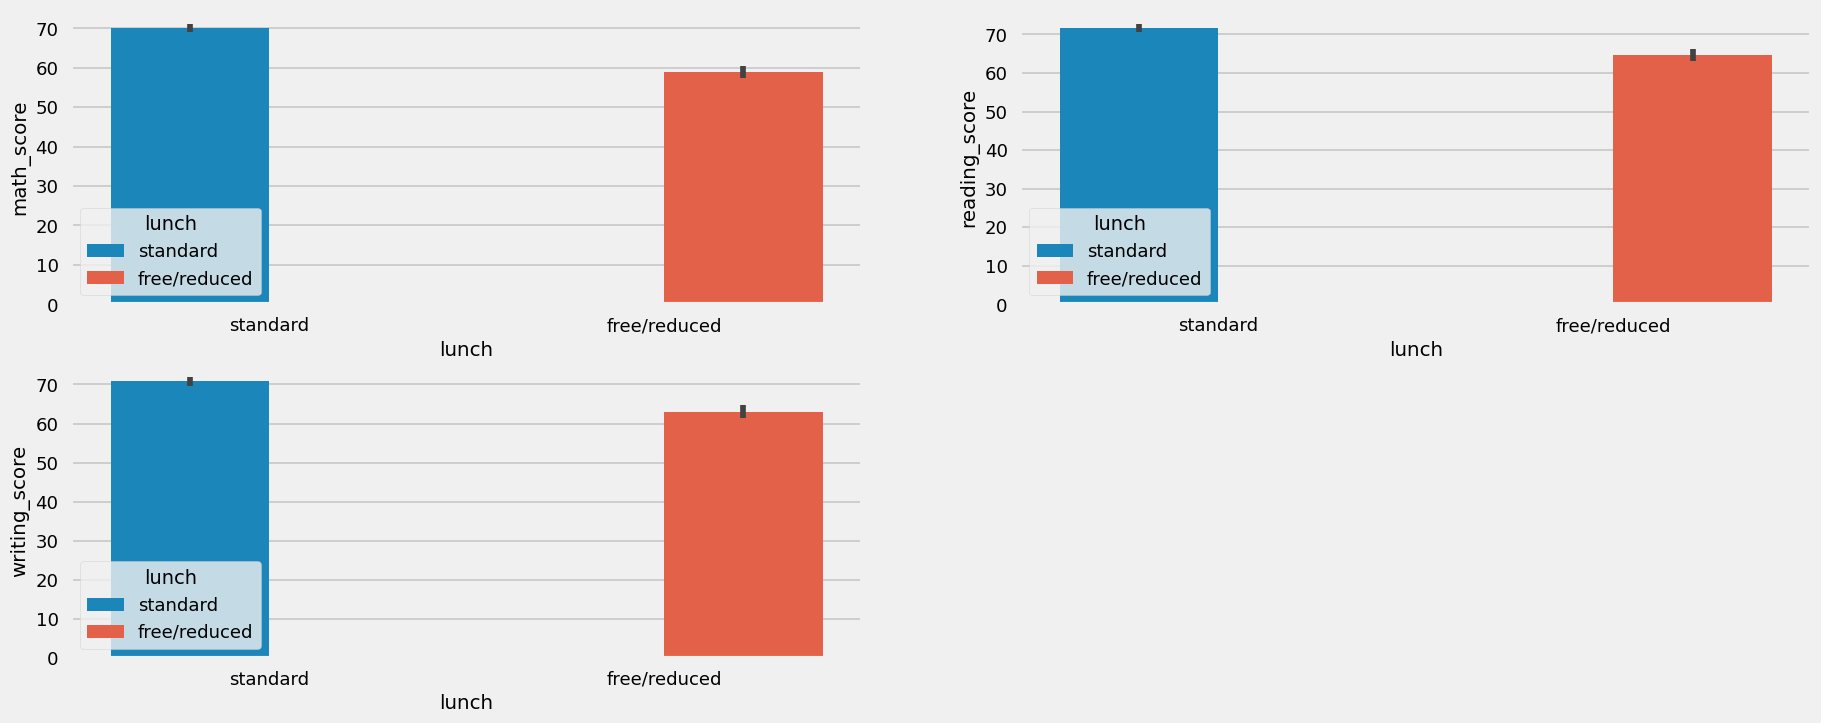

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.barplot (x=students['lunch'], y=students['math_score'], hue=students['lunch'])
plt.subplot(2,2,2)
sns.barplot (x=students['lunch'], y=students['reading_score'],hue=students['lunch'])
plt.subplot(2,2,3)
sns.barplot (x=students['lunch'], y=students['writing_score'], hue=students['lunch'])

**Observation:**

* Students who get Standard lunch performs better than students who get free lunch.

## 4.4.5 TEST PREPARATION COURSE COLUMN

* Is Test preparation course has any impact on student's performance ?

## BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

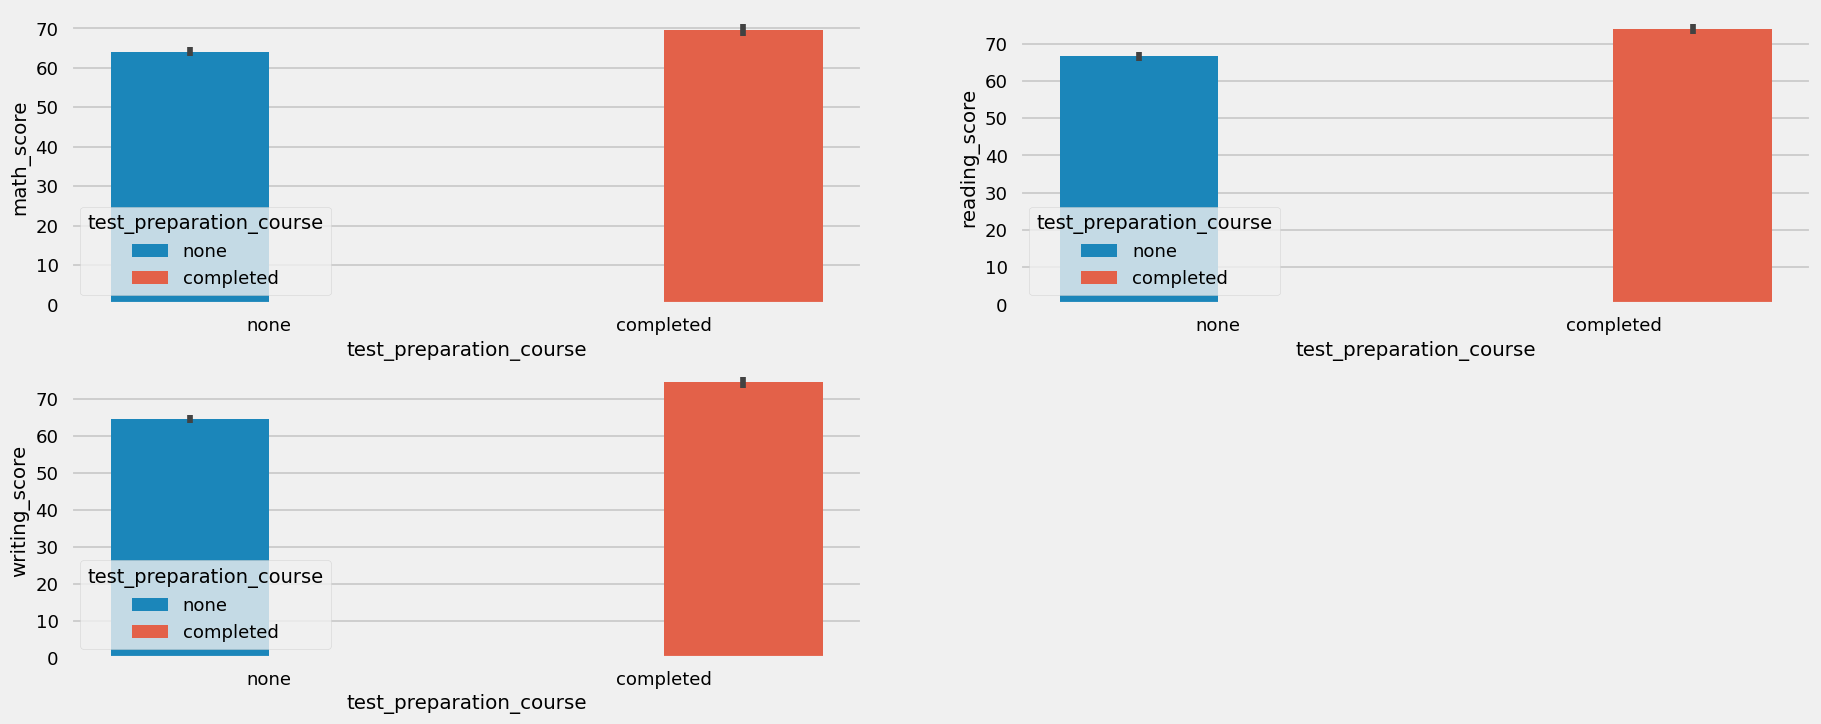

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.barplot (x=students['test_preparation_course'], y=students['math_score'], hue=students['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=students['test_preparation_course'], y=students['reading_score'], hue=students['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=students['test_preparation_course'], y=students['writing_score'], hue=students['test_preparation_course'])


plt.show()

**Observation:**

* Students who have commpleted the Test Preparation Course have scored higher in all three categories than those who haven't taken the course.

## 4.4.6 CHECKING OUTLIERS

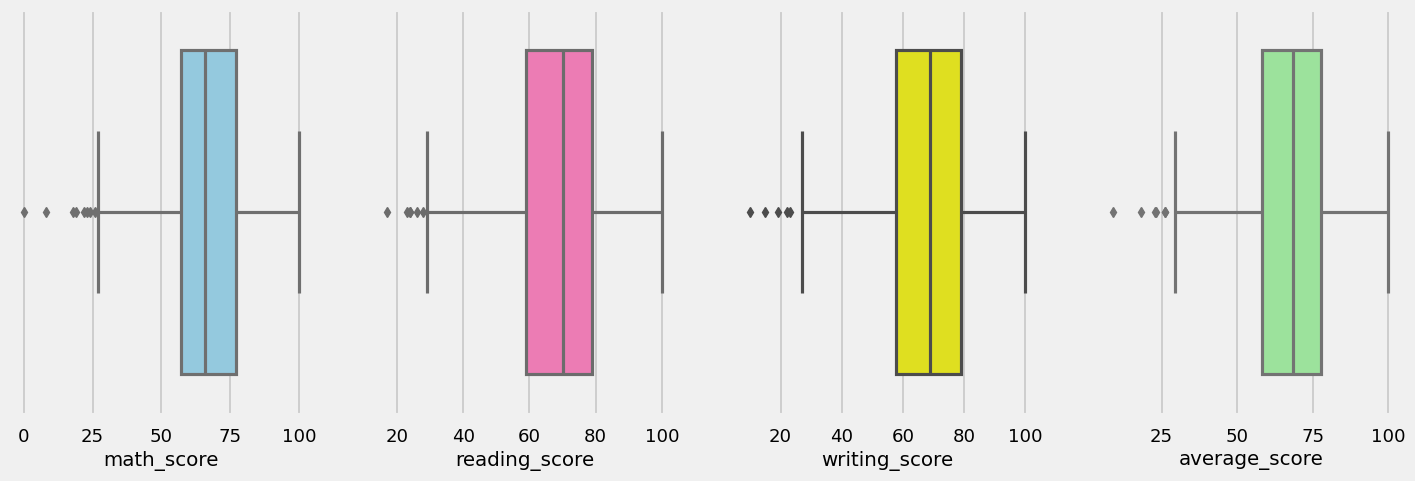

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(students['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(students['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(students['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(students['average_score'],color='lightgreen')
plt.show()

## 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

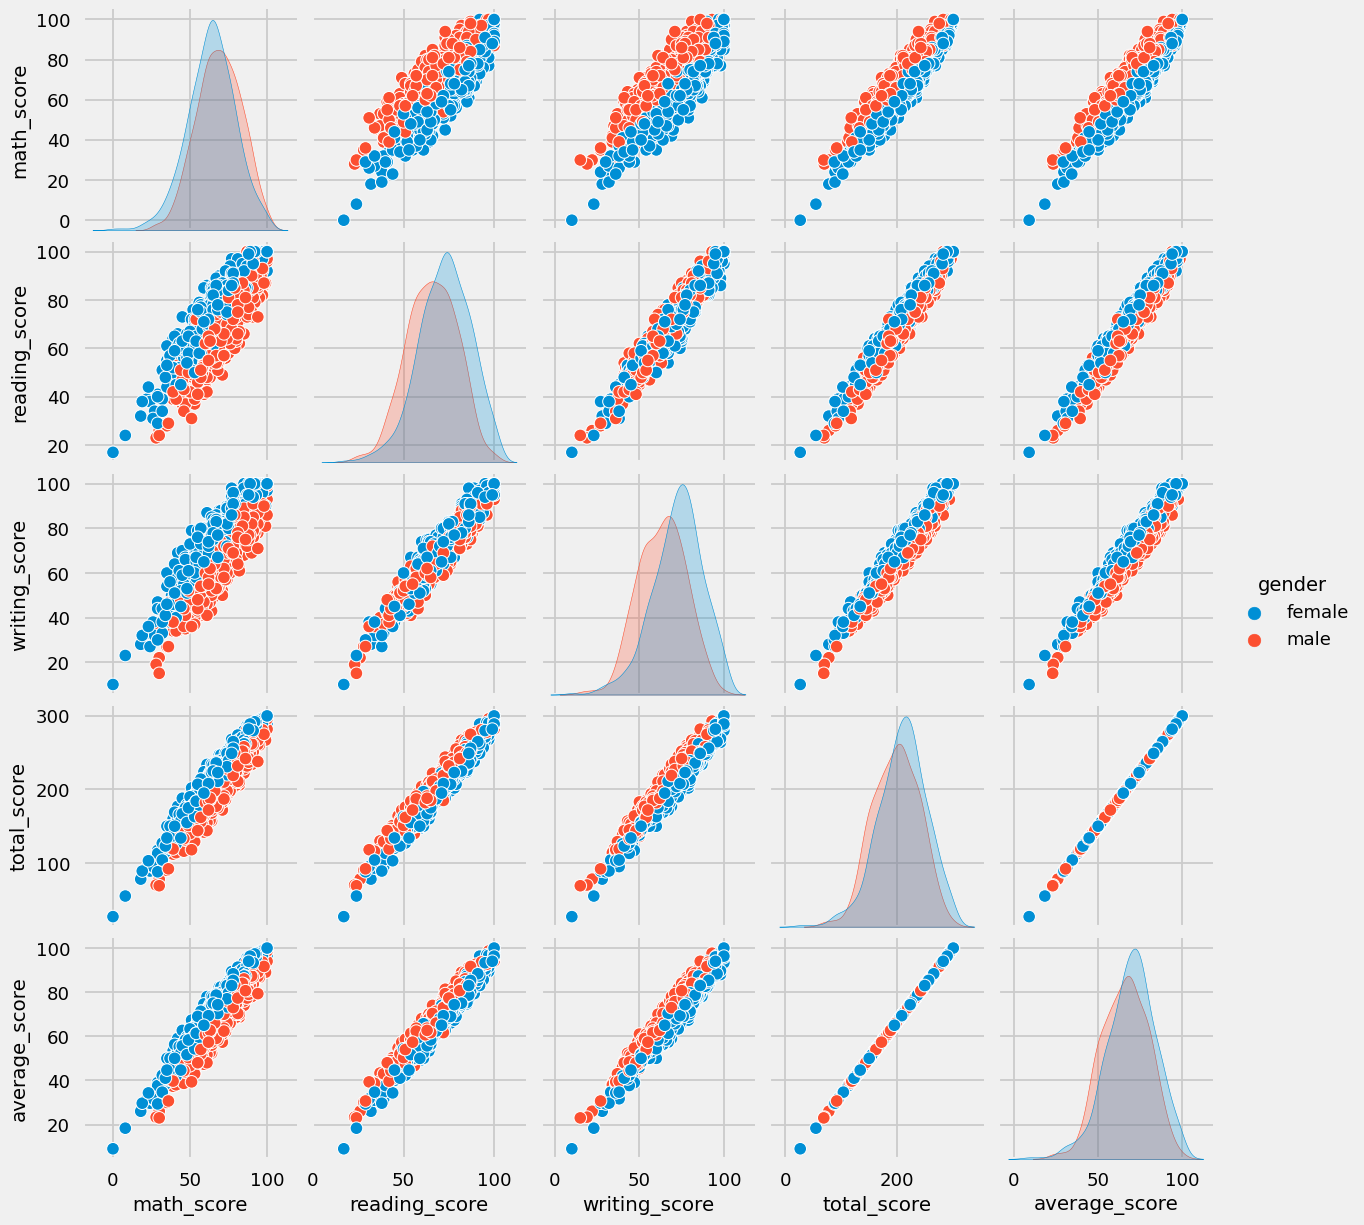

In [37]:
sns.pairplot(students,hue = 'gender')
plt.show()

## 5. Conclusions

* Student's Performance is related with lunch, race, parental level education.
* Female leads in pass percentage and also are top-scorers.
* Student's Performance is not much related with test preparation course.
* But finishing preparation course is beneficial.